In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("dataset.csv")
data.head()

,ID,Distance_to_Center,Location_Score,Num_Bedrooms,Square_Feet,Year_Built,Price
0,0,14.162437,6.379543,4,240.377658,1944,774245.692902
1,1,2.652892,1.253565,2,274.638547,1911,622106.851660
2,2,15.920148,2.810381,3,238.344546,1950,620313.472253
3,3,18.777899,6.539941,2,244.103240,1937,518571.773137
4,4,8.284019,2.070949,5,199.664621,1918,583105.655996


In [4]:
X = data[
    ['Distance_to_Center', 'Location_Score', 'Num_Bedrooms', 'Square_Feet', 'Year_Built']
].values

Y = data['Price'].values

In [5]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

In [6]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [7]:
input_dim = X.shape[1]  # number of features

model = LinearRegressionModel(input_dim)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.00000001)

In [8]:
epochs = 1000
losses = []

for epoch in range(epochs):
    predictions = model(X)
    loss = criterion(predictions, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 353679572992.0
Epoch 100, Loss: 13604860928.0
Epoch 200, Loss: 13514129408.0
Epoch 300, Loss: 13425430528.0
Epoch 400, Loss: 13338677248.0
Epoch 500, Loss: 13253831680.0
Epoch 600, Loss: 13170850816.0
Epoch 700, Loss: 13089690624.0
Epoch 800, Loss: 13010317312.0
Epoch 900, Loss: 12932685824.0


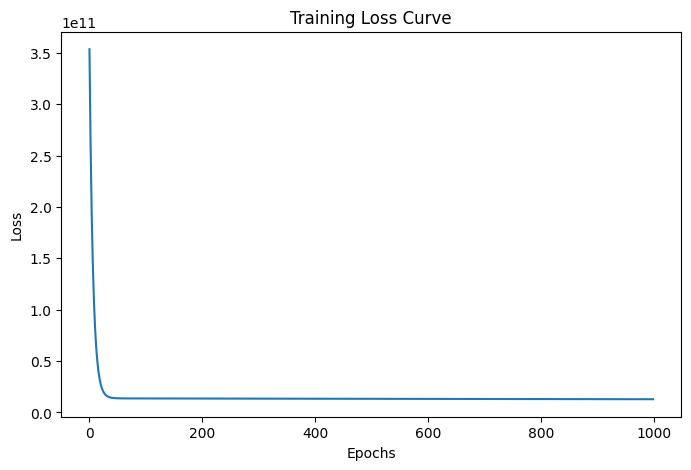

In [9]:
plt.figure(figsize=(8,5))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [10]:
with torch.no_grad():
    predicted_prices = model(X)

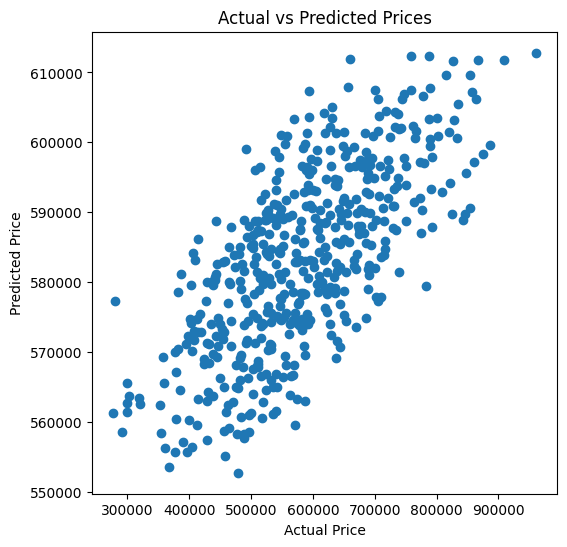

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(Y.numpy(), predicted_prices.numpy())
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [12]:
for name, param in model.named_parameters():
    print(name, param.data)

linear.weight tensor([[  1.5687,   1.2550,   2.7775, 117.2430, 287.4173]])
linear.bias tensor([0.3236])
